<a href="https://colab.research.google.com/github/Kevinfhu/sistemas-de-informaci-n/blob/main/3_1_4_6_Lab_Descriptive_Statistics_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Título](Images/cisco.png)

# Práctica de laboratorio: estadísticas descriptivas en Python 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Objetivos
<p>
<li>**Parte 1: Analizar los datos**</li>
<li>**Parte 2: Visualizar los datos**</li>
</p>
### Aspectos básicos/situación

En esta práctica de laboratorio, importará un conjunto de datos en un marco de pandas y generará estadísticas descriptivas de los datos. Formateará cadenas de texto, informará las estadísticas descriptivas y generará un diagrama de los datos. Por último, experimentará con los parámetros del gráfico para familiarizarse con la diagramación de datos mediante la biblioteca 'matplotlib.pyplot'.

### Recursos necesarios

* Raspberry Pi versión 2 o superior
* 1 computadora con acceso a Internet para la conexión con Raspberry Pi
* Bibliotecas de Python: pandas y matplotlib.pyplot
* Archivos de datos: rpi_describe.csv

## Parte 1: Analizar los datos

El objetivo de la primera parte de esta práctica de laboratorio es utilizar métodos de pandas para importar un conjunto de datos y generar las estadísticas descriptivas siguientes:

1. tamaño de la muestra
2. media
3. mediana
4. desviación estándar
5. mínimo, máximo y rango de valores

#### Paso 1: Configurar el entorno e importar los datos.

Primero, importará los módulos y configurará el entorno para mostrar la salida de 'matplotlib' en la página de la computadora portátil. Usará 'pandas' para importar los datos de un archivo csv a un marco de datos. Trabajará con un archivo que contiene ejemplos de control de calidad para cajas de 20 oz de un producto alimenticio. Los datos se utilizan para verificar la precisión de las máquinas que cargan las cajas.

a) Importe los módulos y configure el entorno.

In [ ]:
# Code cell 1
import pandas as pd
import matplotlib.pyplot as plt


# matplotlib.use('qt5agg')

# given
%matplotlib inline
# import matplotlib
 # required on some Jupyter Notebook installations

b) Importe los datos del archivo 'rpi_describe.csv' mediante el método de pandas read_csv. Utilice "data" como nombre del marco de datos.

In [ ]:
# Code cell 2
# import the csv into the dataframe
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ch3/Data/rpi_describe.csv")




c) Verifique que el archivo se haya importado correctamente mediante el uso de los métodos de pandas 'head' y 'tail' para el marco de datos.

In [ ]:
# Code cell 3
# view the contents of the first five rows in the dataframe
data.head()


,weight
0,20.440
1,20.244
2,20.549
3,20.755
4,20.740


In [ ]:
# Code cell 4
# view the contents of the last five rows in the dataframe
data.tail()


,weight
9995,20.419
9996,20.554
9997,20.768
9998,20.829
9999,20.667


A partir de la salida del método de cola, observará que hay 10 000 filas de datos en el archivo. Si bien se trata sólo de una columna, los pandas administran este archivo de manera muy eficaz.

#### Paso 2: Utilizar pandas para visualizar la tabla de estadísticas descriptivas para el archivo.

Los pandas incluyen varios métodos eficaces para mostrar las estadísticas básicas en un conjunto de datos.

a) El método 'dataframe.describe()' muestra estadísticas del marco de datos.

In [ ]:
# Code cell 5
# use the describe method of the new dataframe to view the table of statistics
data.describe()

,weight
count,10000.000000
mean,20.499212
std,0.199874
min,19.752000
25%,20.365000
50%,20.500000
75%,20.635000
max,21.171000


b) Para trabajar con los valores redondeados de los pesos en el conjunto de datos, puede agregar una nueva columna a los valores redondeados. En los pandas, se accede a las columnas por sus encabezados. Para crear una nueva columna, se utiliza el nombre de la nueva columna, entre comillas, entre corchetes como índice para el marco de datos. El método 'round()' se utiliza para redondear los valores en la columna peso y completar una nueva columna con los valores redondeados.

In [ ]:
# Code cell 6
# Add a new column to the dataframe and populate it with rounded weights.
data['rounded'] = data.weight.round(2)

# Verify that values were added.
# ...
data.head()

,weight,rounded
0,20.440,20.44
1,20.244,20.24
2,20.549,20.55
3,20.755,20.76
4,20.740,20.74


c) También es posible completar una columna con valores calculados. Por ejemplo, 

<pre><code>dataframe['c'] = dataframe['a'] - dataframe['b']</code></pre>

creará la columna c en el marco de datos y la completará con la diferencia entre los valores numéricos en la columna a y b.

Cree una nueva columna en el marco de datos llamada "diff" y complete esa columna con la cantidad de peso sobre o debajo del valor objetivo de 20 onzas. Utilice el valor redondeado para el cálculo.

In [ ]:
# Code cell 7
# Create the new column named "diff" and fill it with values.
#data['diff'] = ???
data['diff'] = data['rounded'] - 20

# Check the result.
data.head()


,weight,rounded,diff
0,20.440,20.44,0.44
1,20.244,20.24,0.24
2,20.549,20.55,0.55
3,20.755,20.76,0.76
4,20.740,20.74,0.74


#### Paso 3: Visualizar las estadísticas descriptivas en texto.

En este paso, creará variables para alojar una serie de estadísticas descriptivas y luego desarrollará cadenas para mostrar los valores. Utilizará lo siguiente:

* 'count()' 
* 'mean()'
* 'median()'
* 'std()'
* 'min()'
* 'max()'

a) Utilice los valores en la columna redondeada del marco de datos. Cree una variable para cada estadística y calcule el rango de valores mediante 'min()' y 'max()' para calcular el rango de valores.

In [ ]:
# Code cell 8
# Create a variables to hold values for the dataset rounded column 
count = data['rounded'].count()
mean = data['rounded'].mean() 
median = data['rounded'].median()
std = data['rounded'].std()
rng = data['rounded'].max() - data['rounded'].min()



b) Para desarrollar cadenas que utilicen texto y variables para informar sobre las estadísticas del conjunto de datos, utilice el método de cadena 'format()' para facilitar la inserción de los valores de las variables en las cadenas. El formateo utiliza marcadores '{}' para indicar dónde deben insertarse los valores de las variables.

Desarrolle oraciones como “La media de la distribución es…” para cada variable creada. En la última oración, incluya 'min()', 'max()' y los valores de rango en las mismas oraciones para practicar el uso de varios marcadores. Puede combinar otras variables en la misma oración, asimismo.

In [ ]:
# Code cell 9
# Create variables to hold your statements.
# countstring = 
# meanstring = 
# stdstring = 
# rangestring = 
countstring = "Hay {} registros en el dataframe".format(count)
meanstring = "La media es {}".format(mean)
stdstring = "La desviación estándar es {}".format(std)
rangestring = "El rango entre el máximo {} y el mínimo es {}".format(data['rounded'].max(), data['rounded'].min(), rng)



c) Utilice la función 'print' para ver la salida de todas las oraciones.

In [ ]:
# Code cell 10
# Print all of your statements
print (countstring)
print(meanstring)
print(stdstring)
print(rangestring)



Hay 10000 registros en el dataframe
La media es 20.499159999999996
La desviación estándar es 0.19990740530823192
El rango entre el máximo 21.17 y el mínimo es 19.75


Observe la salida para la desviación estándar. Puede formatear el número, de modo que sea más fácil comprender los resultados. Por ejemplo, puede cambiar la salida de la desviación estándar para mostrar sólo los primeros 2 dígitos después del punto decimal.

Documento de Python para formatear las cadenas:

https://docs.python.org/2/library/string.html

Este enlace proporciona algunos ejemplos de formateo:

https://mkaz.tech/code/python-string-format.html

In [ ]:
# Code cell 11

# Format the standard deviation result to 2 decimal points
count = data.rounded.count()
stdstring = 'The standard deviation of the distribution is {:.2f}.'.format(std)
print(stdstring)

The standard deviation of the distribution is 0.20.


## Parte 2: Visualizar los datos

En esta parte de la práctica de laboratorio, creará una distribución de frecuencia por cada valor único en el conjunto de datos.

#### Paso 1: Crear un marco de datos que contenga los conteos de frecuencia para el conjunto de datos.

a) Cree un nuevo marco de datos que contenga los conteos de frecuencia mediante el método 'value_counts()'. Este método crea un objeto de serie, no un marco de datos. La columna de índice de esta serie está dada por los valores únicos de la serie, con el nombre de columna que se establece automáticamente en 0. Para convertir una serie en un DataFrame, puede utilizar la función 'to_frame()'. Llamar adicionalmente al método 'reset_index()' en el 'DataFrame' resultante transformará la columna de índice anterior en una nueva columna de datos, cuyo nombre se establece automáticamente en 'index'. Cambiaré el nombre de las columnas más adelante.



</font>Utilizará 'to_frame()' con los métodos 'reset_index()' para crear un marco de datos de pandas a partir del objeto de serie. 

Utilizará la columna redondeada del marco de datos de los datos con el método 'value_counts()'. Por ejemplo:

<pre><code>variable = dataframe['columnName'].value_counts()</code></pre>

In [ ]:
# Code cell 12
# Create a variable called 'freq' to hold the weight values and their frequencies
freq = data['rounded'].value_counts()
#freq
# Convert the freq object to a data frame. Use to_frame().
freq = freq.to_frame().reset_index()
type(freq)
freq.head()


,index,rounded
0,20.48,228
1,20.50,226
2,20.43,218
3,20.46,213
4,20.45,210


b) Utilice la función 'type()' con el nombre de la variable como un argumento para verificar que 'freq' no sea un objeto del marco de datos.

In [ ]:
# Code cell 13
# Verify the type of the freq object.
type(freq)




pandas.core.frame.DataFrame

c) Utilice 'head' para ver el nuevo marco de datos. Las columnas del marco de datos no tienen un nombre claro. Cámbieles el nombre a "value" y "freq"  mediante el atributo de las columnas del marco de datos. Por ejemplo:
<pre><code>dataframe.columns = ['column1','column2']</code></pre>

In [ ]:
# Code cell 14
# Rename the columns in the dataframe. 
data_columns = ['value','freq']
# Verify the result.

freq.head()



,index,rounded
0,20.48,228
1,20.50,226
2,20.43,218
3,20.46,213
4,20.45,210


#### Paso 2: Trazar un gráfico de la distribución de frecuencia.

a) El módulo 'matplotlib.pyplot' se importó como plt anteriormente en la práctica de laboratorio. Los métodos del módulo se utilizan para formatear y mostrar un diagrama de dispersión de los datos de frecuencia para un conjunto de datos.

AttributeError: ignored

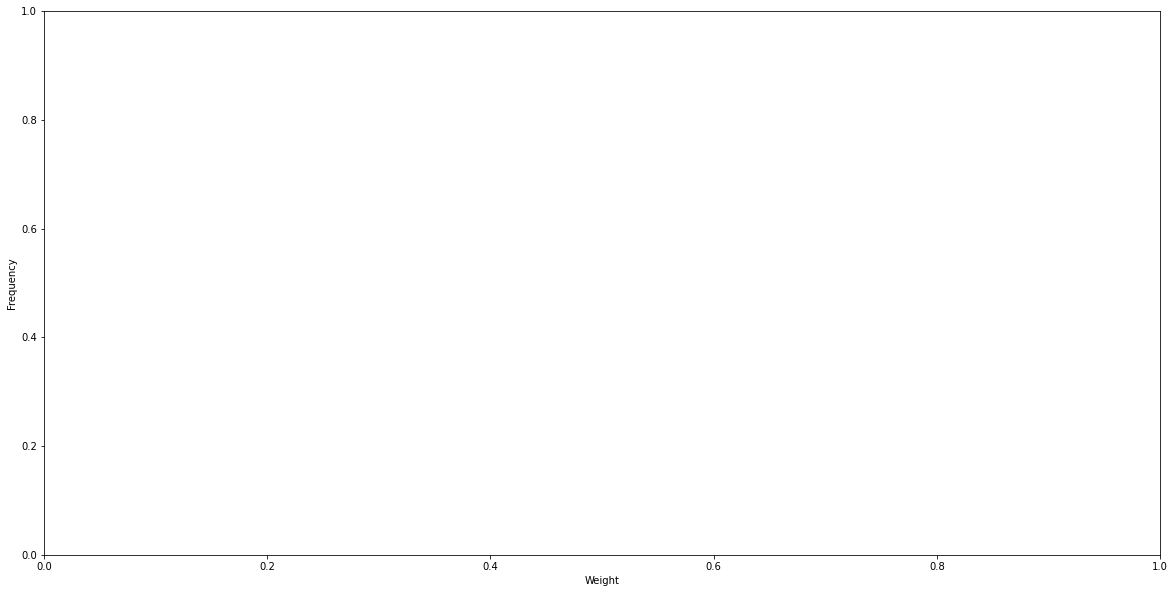

In [ ]:


# Code cell 15

# Set a size for the graph
plt.figure(figsize=(20,10))

# Add axis labels
plt.ylabel('Frequency')
plt.xlabel('Weight')

# Plot the graph using a round symbol "o" of size 10
plt.plot(freq.value,freq.freq, "o", markersize = 10, color = 'g')

El diagrama de la frecuencia de los valores se  asemeja al de una distribución gaussiana, centrada alrededor del valor de 20.5. En el capítulo 4, verá cómo esta forma se debe a un error sistemático y aleatorio en los sistemas de producción o medición.

b) Experimente lo siguiente: diagrame los datos con dimensiones, marcadores, tamaños de marcadores y colores diferentes. Use los enlaces a continuación para los valores. También puede utilizar el ejemplo anterior para intentar diferentes dimensiones de figuras.

marcadores http://matplotlib.org/api/markers_api.html

colores http://matplotlib.org/api/colors_api.html

<font size='0.5'>&copy; 2017 Cisco y/o sus filiales. Todos los derechos reservados. Este documento es información pública de Cisco.<font>